# Assignment 3

Assignment part 1: Find a Wikipedia article with at least 20,000 revisions. How has the proportion of users editing from mobile web devices (according to the tags) changed over time?

Assignment part 2: See the regexes and tags at: https://meta.wikimedia.org/wiki/MediaWiki:XTools-AutoEdits.json
Implement functions that can be applied to the revisions_df dataframe to create new columns based on the following tools:
- global: Huggle, Undo
- en: Generic rollback, undo
- en.wikipedia.org: Huggle, Bot revert, Twinkle

For the article you chose in part 1, how has the proportion of tool-assisted edits changed over time?


In [19]:
!pip install mwapi

Defaulting to user installation because normal site-packages is not writeable


In [155]:
# IMPORT STATEMENTS
import pandas as pd
import mwapi
import numpy as np
import json
pd.set_option("max_colwidth", 500)
import matplotlib.ticker as ticker
import matplotlib.ticker as plt

In [21]:
session = mwapi.Session("https://en.wikipedia.org",
                        user_agent="User:Nvgopal")

*Part 1*

In [25]:
india_revs = session.get(action="query",
                        prop="revisions",
                        titles="India",
                        rvprop="ids|timestamp|comment|user|userid|size|tags|roles",
                        rvlimit=500,
                        continuation=True)

In [26]:
requests = []
for request in india_revs:
    requests.append(request)

In [27]:
len(requests)

53

In [87]:
list_of_dfs = []
for request in requests:
    for page in request['query']['pages'].items():
        list_of_dfs.append(pd.DataFrame(page[1]['revisions']))

In [127]:
revisions_df = pd.concat(list_of_dfs)

In [128]:
revisions_df

,revid,parentid,user,userid,timestamp,size,roles,comment,tags,anon,commenthidden,userhidden,suppressed
0,1050568168,1050567549,Surge elec,16839519.0,2021-10-18T16:33:24Z,310858,[main],Added author name in source,[],NaN,NaN,NaN,NaN
1,1050567549,1050566945,Surge elec,16839519.0,2021-10-18T16:28:24Z,310835,[main],Added author name in source,[],NaN,NaN,NaN,NaN
2,1050566945,1050564240,Surge elec,16839519.0,2021-10-18T16:23:31Z,310811,[main],Added author names in source,[],NaN,NaN,NaN,NaN
3,1050564240,1050563460,Surge elec,16839519.0,2021-10-18T16:04:20Z,310766,[main],"Corrected source (url is broken: added archived url, added archivedate, added url status)",[],NaN,NaN,NaN,NaN
4,1050563460,1050562657,Surge elec,16839519.0,2021-10-18T15:59:14Z,310589,[main],Date corrected,[],NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,36433,22162,Mav,62.0,2002-03-03T12:01:00Z,2541,[main],bold ; - [[talk:India|/Talk]],[],NaN,NaN,NaN,NaN
352,22162,396114277,Conversion script,1226483.0,2002-02-25T15:43:11Z,2559,[main],Automated conversion,[],NaN,NaN,NaN,NaN
353,396114277,395697644,200.191.188.xxx,0.0,2001-12-03T17:29:17Z,2471,[main],*,[],,NaN,NaN,NaN
354,258507,258506,Hagedis,42463.0,2001-11-16T00:03:41Z,2522,[main],relink history,[],NaN,NaN,NaN,NaN


In [129]:
revisions_df['timestamp_dt'] = pd.to_datetime(revisions_df['timestamp'])

revisions_df

,revid,parentid,user,userid,timestamp,size,roles,comment,tags,anon,commenthidden,userhidden,suppressed,timestamp_dt
0,1050568168,1050567549,Surge elec,16839519.0,2021-10-18T16:33:24Z,310858,[main],Added author name in source,[],NaN,NaN,NaN,NaN,2021-10-18 16:33:24+00:00
1,1050567549,1050566945,Surge elec,16839519.0,2021-10-18T16:28:24Z,310835,[main],Added author name in source,[],NaN,NaN,NaN,NaN,2021-10-18 16:28:24+00:00
2,1050566945,1050564240,Surge elec,16839519.0,2021-10-18T16:23:31Z,310811,[main],Added author names in source,[],NaN,NaN,NaN,NaN,2021-10-18 16:23:31+00:00
3,1050564240,1050563460,Surge elec,16839519.0,2021-10-18T16:04:20Z,310766,[main],"Corrected source (url is broken: added archived url, added archivedate, added url status)",[],NaN,NaN,NaN,NaN,2021-10-18 16:04:20+00:00
4,1050563460,1050562657,Surge elec,16839519.0,2021-10-18T15:59:14Z,310589,[main],Date corrected,[],NaN,NaN,NaN,NaN,2021-10-18 15:59:14+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,36433,22162,Mav,62.0,2002-03-03T12:01:00Z,2541,[main],bold ; - [[talk:India|/Talk]],[],NaN,NaN,NaN,NaN,2002-03-03 12:01:00+00:00
352,22162,396114277,Conversion script,1226483.0,2002-02-25T15:43:11Z,2559,[main],Automated conversion,[],NaN,NaN,NaN,NaN,2002-02-25 15:43:11+00:00
353,396114277,395697644,200.191.188.xxx,0.0,2001-12-03T17:29:17Z,2471,[main],*,[],,NaN,NaN,NaN,2001-12-03 17:29:17+00:00
354,258507,258506,Hagedis,42463.0,2001-11-16T00:03:41Z,2522,[main],relink history,[],NaN,NaN,NaN,NaN,2001-11-16 00:03:41+00:00


In [130]:
# revisions_df = revisions_df.set_index("timestamp_dt")
# revisions_df.groupby(['timestamp_dt']).count()

In [131]:
# fig = revisions_df.plot(figsize=(12,8))
# fig.set_ylabel("proportion")
# fig.set_title("the proportion of users editing from mobile web devices ")

*Part 2: Regex*

In [132]:
import re

In [133]:
def is_global_huggle_regex(comment):
    if comment is None:
        return 0
    if comment is np.nan:
        return 0
    if len(comment) == 0:
        return 0
    
    pattern = "\(\[\[WP:HG"
    result = re.search(pattern,comment)
    
    if result is None:
        return 0
    else:
        return 1

In [134]:
revisions_df['is_global_huggle_regex'] = revisions_df['comment'].apply(is_global_huggle_regex)
revisions_df.head(5)

,revid,parentid,user,userid,timestamp,size,roles,comment,tags,anon,commenthidden,userhidden,suppressed,timestamp_dt,is_global_huggle_regex
0,1050568168,1050567549,Surge elec,16839519.0,2021-10-18T16:33:24Z,310858,[main],Added author name in source,[],NaN,NaN,NaN,NaN,2021-10-18 16:33:24+00:00,0
1,1050567549,1050566945,Surge elec,16839519.0,2021-10-18T16:28:24Z,310835,[main],Added author name in source,[],NaN,NaN,NaN,NaN,2021-10-18 16:28:24+00:00,0
2,1050566945,1050564240,Surge elec,16839519.0,2021-10-18T16:23:31Z,310811,[main],Added author names in source,[],NaN,NaN,NaN,NaN,2021-10-18 16:23:31+00:00,0
3,1050564240,1050563460,Surge elec,16839519.0,2021-10-18T16:04:20Z,310766,[main],"Corrected source (url is broken: added archived url, added archivedate, added url status)",[],NaN,NaN,NaN,NaN,2021-10-18 16:04:20+00:00,0
4,1050563460,1050562657,Surge elec,16839519.0,2021-10-18T15:59:14Z,310589,[main],Date corrected,[],NaN,NaN,NaN,NaN,2021-10-18 15:59:14+00:00,0


In [135]:
def is_global_huggle_tags(tags):
    
    if tags is None:
        return 0
    if tags is np.nan:
        return 0
    
    try:
        tag0 = tags[0]
    except Exception:   # If there is no first element
        return 0
    
    if tag0 == "huggle":
        return 1
    else:
        return 0

In [136]:
revisions_df['is_global_huggle_tags'] = revisions_df['tags'].apply(is_global_huggle_tags)

In [137]:
revisions_df.head(5)

,revid,parentid,user,userid,timestamp,size,roles,comment,tags,anon,commenthidden,userhidden,suppressed,timestamp_dt,is_global_huggle_regex,is_global_huggle_tags
0,1050568168,1050567549,Surge elec,16839519.0,2021-10-18T16:33:24Z,310858,[main],Added author name in source,[],NaN,NaN,NaN,NaN,2021-10-18 16:33:24+00:00,0,0
1,1050567549,1050566945,Surge elec,16839519.0,2021-10-18T16:28:24Z,310835,[main],Added author name in source,[],NaN,NaN,NaN,NaN,2021-10-18 16:28:24+00:00,0,0
2,1050566945,1050564240,Surge elec,16839519.0,2021-10-18T16:23:31Z,310811,[main],Added author names in source,[],NaN,NaN,NaN,NaN,2021-10-18 16:23:31+00:00,0,0
3,1050564240,1050563460,Surge elec,16839519.0,2021-10-18T16:04:20Z,310766,[main],"Corrected source (url is broken: added archived url, added archivedate, added url status)",[],NaN,NaN,NaN,NaN,2021-10-18 16:04:20+00:00,0,0
4,1050563460,1050562657,Surge elec,16839519.0,2021-10-18T15:59:14Z,310589,[main],Date corrected,[],NaN,NaN,NaN,NaN,2021-10-18 15:59:14+00:00,0,0


In [138]:
def is_global_undo_tags(tags):
    
    if tags is None:
        return 0
    if tags is np.nan:
        return 0
    
    try:
        tag0 = tags[0]
    except Exception:   # If there is no first element
        return 0
    
    if tag0 == "mw-undo":
        return 1
    else:
        return 0

In [139]:
revisions_df['is_global_undo_tags'] = revisions_df['tags'].apply(is_global_undo_tags)
revisions_df.head(5)

,revid,parentid,user,userid,timestamp,size,roles,comment,tags,anon,commenthidden,userhidden,suppressed,timestamp_dt,is_global_huggle_regex,is_global_huggle_tags,is_global_undo_tags
0,1050568168,1050567549,Surge elec,16839519.0,2021-10-18T16:33:24Z,310858,[main],Added author name in source,[],NaN,NaN,NaN,NaN,2021-10-18 16:33:24+00:00,0,0,0
1,1050567549,1050566945,Surge elec,16839519.0,2021-10-18T16:28:24Z,310835,[main],Added author name in source,[],NaN,NaN,NaN,NaN,2021-10-18 16:28:24+00:00,0,0,0
2,1050566945,1050564240,Surge elec,16839519.0,2021-10-18T16:23:31Z,310811,[main],Added author names in source,[],NaN,NaN,NaN,NaN,2021-10-18 16:23:31+00:00,0,0,0
3,1050564240,1050563460,Surge elec,16839519.0,2021-10-18T16:04:20Z,310766,[main],"Corrected source (url is broken: added archived url, added archivedate, added url status)",[],NaN,NaN,NaN,NaN,2021-10-18 16:04:20+00:00,0,0,0
4,1050563460,1050562657,Surge elec,16839519.0,2021-10-18T15:59:14Z,310589,[main],Date corrected,[],NaN,NaN,NaN,NaN,2021-10-18 15:59:14+00:00,0,0,0


In [140]:
def is_en_generic_regex(comment):
    if comment is None:
        return 0
    if comment is np.nan:
        return 0
    if len(comment) == 0:
        return 0
    
    pattern = "^(\[\[Help:Reverting\|Reverted\]\]|Reverted) edits by \[\[Special:(Contribs|Contributions)\/.*?\|.*?\]\]( \(\[\[User talk:.*?\|talk\]\]\))? to last (version|revision) by"
    result = re.search(pattern,comment)
    
    if result is None:
        return 0
    else:
        return 1

In [141]:
revisions_df['is_en_generic_regex'] = revisions_df['comment'].apply(is_en_generic_regex)
revisions_df.head(5)

,revid,parentid,user,userid,timestamp,size,roles,comment,tags,anon,commenthidden,userhidden,suppressed,timestamp_dt,is_global_huggle_regex,is_global_huggle_tags,is_global_undo_tags,is_en_generic_regex
0,1050568168,1050567549,Surge elec,16839519.0,2021-10-18T16:33:24Z,310858,[main],Added author name in source,[],NaN,NaN,NaN,NaN,2021-10-18 16:33:24+00:00,0,0,0,0
1,1050567549,1050566945,Surge elec,16839519.0,2021-10-18T16:28:24Z,310835,[main],Added author name in source,[],NaN,NaN,NaN,NaN,2021-10-18 16:28:24+00:00,0,0,0,0
2,1050566945,1050564240,Surge elec,16839519.0,2021-10-18T16:23:31Z,310811,[main],Added author names in source,[],NaN,NaN,NaN,NaN,2021-10-18 16:23:31+00:00,0,0,0,0
3,1050564240,1050563460,Surge elec,16839519.0,2021-10-18T16:04:20Z,310766,[main],"Corrected source (url is broken: added archived url, added archivedate, added url status)",[],NaN,NaN,NaN,NaN,2021-10-18 16:04:20+00:00,0,0,0,0
4,1050563460,1050562657,Surge elec,16839519.0,2021-10-18T15:59:14Z,310589,[main],Date corrected,[],NaN,NaN,NaN,NaN,2021-10-18 15:59:14+00:00,0,0,0,0


In [142]:
def is_en_undo_regex(comment):
    if comment is None:
        return 0
    if comment is np.nan:
        return 0
    if len(comment) == 0:
        return 0
    
    pattern = "^(Undid|Undo|\[\[WP:UNDO\|Undid\]\]) revision \d+ by \[\[Special:(Contribs|Contributions)\/.*?\|.*?\]\]"
    result = re.search(pattern,comment)
    
    if result is None:
        return 0
    else:
        return 1

In [143]:
revisions_df['is_en_undo_regex'] = revisions_df['comment'].apply(is_en_undo_regex)
revisions_df.head(5)

,revid,parentid,user,userid,timestamp,size,roles,comment,tags,anon,commenthidden,userhidden,suppressed,timestamp_dt,is_global_huggle_regex,is_global_huggle_tags,is_global_undo_tags,is_en_generic_regex,is_en_undo_regex
0,1050568168,1050567549,Surge elec,16839519.0,2021-10-18T16:33:24Z,310858,[main],Added author name in source,[],NaN,NaN,NaN,NaN,2021-10-18 16:33:24+00:00,0,0,0,0,0
1,1050567549,1050566945,Surge elec,16839519.0,2021-10-18T16:28:24Z,310835,[main],Added author name in source,[],NaN,NaN,NaN,NaN,2021-10-18 16:28:24+00:00,0,0,0,0,0
2,1050566945,1050564240,Surge elec,16839519.0,2021-10-18T16:23:31Z,310811,[main],Added author names in source,[],NaN,NaN,NaN,NaN,2021-10-18 16:23:31+00:00,0,0,0,0,0
3,1050564240,1050563460,Surge elec,16839519.0,2021-10-18T16:04:20Z,310766,[main],"Corrected source (url is broken: added archived url, added archivedate, added url status)",[],NaN,NaN,NaN,NaN,2021-10-18 16:04:20+00:00,0,0,0,0,0
4,1050563460,1050562657,Surge elec,16839519.0,2021-10-18T15:59:14Z,310589,[main],Date corrected,[],NaN,NaN,NaN,NaN,2021-10-18 15:59:14+00:00,0,0,0,0,0


In [144]:
def is_wiki_bot_regex(comment):
    if comment is None:
        return 0
    if comment is np.nan:
        return 0
    if len(comment) == 0:
        return 0
    
    pattern = 	"^Reverting possible (vandalism|test edit).*by.*\(Bot|BOT( EDIT)?\)$|^BOT (- )?(Reverted edits? by|rv)|^vandalism from \[\[.*?\(\d+\) - reverted"
    result = re.search(pattern,comment)
    
    if result is None:
        return 0
    else:
        return 1

In [145]:
revisions_df['is_wiki_bot_regex'] = revisions_df['comment'].apply(is_wiki_bot_regex)
revisions_df.head(5)

,revid,parentid,user,userid,timestamp,size,roles,comment,tags,anon,commenthidden,userhidden,suppressed,timestamp_dt,is_global_huggle_regex,is_global_huggle_tags,is_global_undo_tags,is_en_generic_regex,is_en_undo_regex,is_wiki_bot_regex
0,1050568168,1050567549,Surge elec,16839519.0,2021-10-18T16:33:24Z,310858,[main],Added author name in source,[],NaN,NaN,NaN,NaN,2021-10-18 16:33:24+00:00,0,0,0,0,0,0
1,1050567549,1050566945,Surge elec,16839519.0,2021-10-18T16:28:24Z,310835,[main],Added author name in source,[],NaN,NaN,NaN,NaN,2021-10-18 16:28:24+00:00,0,0,0,0,0,0
2,1050566945,1050564240,Surge elec,16839519.0,2021-10-18T16:23:31Z,310811,[main],Added author names in source,[],NaN,NaN,NaN,NaN,2021-10-18 16:23:31+00:00,0,0,0,0,0,0
3,1050564240,1050563460,Surge elec,16839519.0,2021-10-18T16:04:20Z,310766,[main],"Corrected source (url is broken: added archived url, added archivedate, added url status)",[],NaN,NaN,NaN,NaN,2021-10-18 16:04:20+00:00,0,0,0,0,0,0
4,1050563460,1050562657,Surge elec,16839519.0,2021-10-18T15:59:14Z,310589,[main],Date corrected,[],NaN,NaN,NaN,NaN,2021-10-18 15:59:14+00:00,0,0,0,0,0,0


In [146]:
def is_wiki_twinkle_regex(comment):
    if comment is None:
        return 0
    if comment is np.nan:
        return 0
    if len(comment) == 0:
        return 0
    
    pattern = "(Wikipedia|WP):(TW|TWINKLE|Twinkle|FRIENDLY)"
    result = re.search(pattern,comment)
    
    if result is None:
        return 0
    else:
        return 1

In [147]:
revisions_df['is_wiki_twinkle_regex'] = revisions_df['comment'].apply(is_wiki_twinkle_regex)
revisions_df.head(5)

,revid,parentid,user,userid,timestamp,size,roles,comment,tags,anon,...,userhidden,suppressed,timestamp_dt,is_global_huggle_regex,is_global_huggle_tags,is_global_undo_tags,is_en_generic_regex,is_en_undo_regex,is_wiki_bot_regex,is_wiki_twinkle_regex
0,1050568168,1050567549,Surge elec,16839519.0,2021-10-18T16:33:24Z,310858,[main],Added author name in source,[],NaN,...,NaN,NaN,2021-10-18 16:33:24+00:00,0,0,0,0,0,0,0
1,1050567549,1050566945,Surge elec,16839519.0,2021-10-18T16:28:24Z,310835,[main],Added author name in source,[],NaN,...,NaN,NaN,2021-10-18 16:28:24+00:00,0,0,0,0,0,0,0
2,1050566945,1050564240,Surge elec,16839519.0,2021-10-18T16:23:31Z,310811,[main],Added author names in source,[],NaN,...,NaN,NaN,2021-10-18 16:23:31+00:00,0,0,0,0,0,0,0
3,1050564240,1050563460,Surge elec,16839519.0,2021-10-18T16:04:20Z,310766,[main],"Corrected source (url is broken: added archived url, added archivedate, added url status)",[],NaN,...,NaN,NaN,2021-10-18 16:04:20+00:00,0,0,0,0,0,0,0
4,1050563460,1050562657,Surge elec,16839519.0,2021-10-18T15:59:14Z,310589,[main],Date corrected,[],NaN,...,NaN,NaN,2021-10-18 15:59:14+00:00,0,0,0,0,0,0,0


In [148]:
def is_wiki_twinkle_tags(tags):
    
    if tags is None:
        return 0
    if tags is np.nan:
        return 0
    
    try:
        tag0 = tags[0]
    except Exception:   # If there is no first element
        return 0
    
    if tag0 == "twinkle":
        return 1
    else:
        return 0

In [149]:
revisions_df['is_wiki_twinkle_tags'] = revisions_df['tags'].apply(is_wiki_twinkle_tags)
revisions_df.head(5)

,revid,parentid,user,userid,timestamp,size,roles,comment,tags,anon,...,suppressed,timestamp_dt,is_global_huggle_regex,is_global_huggle_tags,is_global_undo_tags,is_en_generic_regex,is_en_undo_regex,is_wiki_bot_regex,is_wiki_twinkle_regex,is_wiki_twinkle_tags
0,1050568168,1050567549,Surge elec,16839519.0,2021-10-18T16:33:24Z,310858,[main],Added author name in source,[],NaN,...,NaN,2021-10-18 16:33:24+00:00,0,0,0,0,0,0,0,0
1,1050567549,1050566945,Surge elec,16839519.0,2021-10-18T16:28:24Z,310835,[main],Added author name in source,[],NaN,...,NaN,2021-10-18 16:28:24+00:00,0,0,0,0,0,0,0,0
2,1050566945,1050564240,Surge elec,16839519.0,2021-10-18T16:23:31Z,310811,[main],Added author names in source,[],NaN,...,NaN,2021-10-18 16:23:31+00:00,0,0,0,0,0,0,0,0
3,1050564240,1050563460,Surge elec,16839519.0,2021-10-18T16:04:20Z,310766,[main],"Corrected source (url is broken: added archived url, added archivedate, added url status)",[],NaN,...,NaN,2021-10-18 16:04:20+00:00,0,0,0,0,0,0,0,0
4,1050563460,1050562657,Surge elec,16839519.0,2021-10-18T15:59:14Z,310589,[main],Date corrected,[],NaN,...,NaN,2021-10-18 15:59:14+00:00,0,0,0,0,0,0,0,0


In [150]:
revisions_df['Total']=revisions_df.iloc[:,-8:].sum(axis=1)
revisions_df

,revid,parentid,user,userid,timestamp,size,roles,comment,tags,anon,...,timestamp_dt,is_global_huggle_regex,is_global_huggle_tags,is_global_undo_tags,is_en_generic_regex,is_en_undo_regex,is_wiki_bot_regex,is_wiki_twinkle_regex,is_wiki_twinkle_tags,Total
0,1050568168,1050567549,Surge elec,16839519.0,2021-10-18T16:33:24Z,310858,[main],Added author name in source,[],NaN,...,2021-10-18 16:33:24+00:00,0,0,0,0,0,0,0,0,0
1,1050567549,1050566945,Surge elec,16839519.0,2021-10-18T16:28:24Z,310835,[main],Added author name in source,[],NaN,...,2021-10-18 16:28:24+00:00,0,0,0,0,0,0,0,0,0
2,1050566945,1050564240,Surge elec,16839519.0,2021-10-18T16:23:31Z,310811,[main],Added author names in source,[],NaN,...,2021-10-18 16:23:31+00:00,0,0,0,0,0,0,0,0,0
3,1050564240,1050563460,Surge elec,16839519.0,2021-10-18T16:04:20Z,310766,[main],"Corrected source (url is broken: added archived url, added archivedate, added url status)",[],NaN,...,2021-10-18 16:04:20+00:00,0,0,0,0,0,0,0,0,0
4,1050563460,1050562657,Surge elec,16839519.0,2021-10-18T15:59:14Z,310589,[main],Date corrected,[],NaN,...,2021-10-18 15:59:14+00:00,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,36433,22162,Mav,62.0,2002-03-03T12:01:00Z,2541,[main],bold ; - [[talk:India|/Talk]],[],NaN,...,2002-03-03 12:01:00+00:00,0,0,0,0,0,0,0,0,0
352,22162,396114277,Conversion script,1226483.0,2002-02-25T15:43:11Z,2559,[main],Automated conversion,[],NaN,...,2002-02-25 15:43:11+00:00,0,0,0,0,0,0,0,0,0
353,396114277,395697644,200.191.188.xxx,0.0,2001-12-03T17:29:17Z,2471,[main],*,[],,...,2001-12-03 17:29:17+00:00,0,0,0,0,0,0,0,0,0
354,258507,258506,Hagedis,42463.0,2001-11-16T00:03:41Z,2522,[main],relink history,[],NaN,...,2001-11-16 00:03:41+00:00,0,0,0,0,0,0,0,0,0


In [151]:
revisions_df = revisions_df.set_index("timestamp_dt")
revisions_df = revisions_df[['Total']]

Text(0.5, 1.0, 'edits made with digital tools')

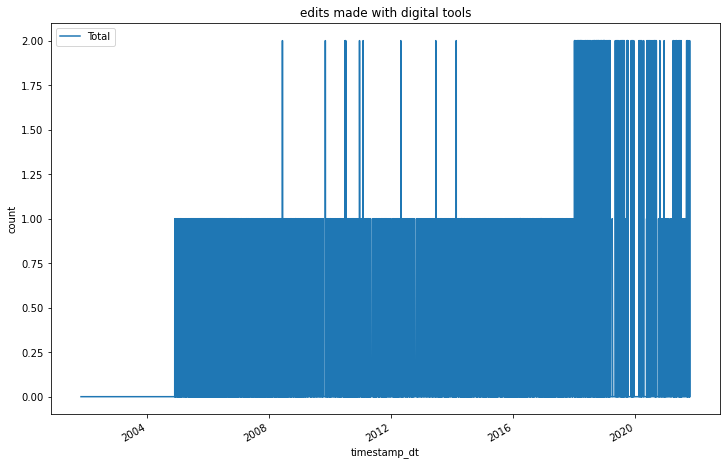

In [162]:
fig = revisions_df.plot(figsize=(12,8))
fig.set_ylabel("count")
fig.set_title("edits made with digital tools")
